# 10. Phân lớp ảnh sử dụng mạng convolutional neural networks với pretrained model VGG16

Convolutional neural networks hay mạng neural tích chập. Đúng như cái tên, mạng dựa trên việc nhân chập ảnh đầu vào với các filter (không khác gì phép convolution cô Thảo đã dạy trên lớp). Ta sẽ sử dụng 1 mạng CNN đã được train trước đó là VGG16 với bộ phân lớp softmax để phân lớp cho 1 bức ảnh đầu vào ngẫu nhiên (ở đây ta sẽ sử dụng ảnh cô Lenna).

In [5]:
# import các thư viện, môi trường cần thiết
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.preprocessing import image
from keras.applications.vgg16 import  preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications import VGG16

In [7]:
# define mạng VGG16 đã được pretrained trước với các trọng số đã được học
model = VGG16()
# load ảnh cô gái lenna đội mũ
img = image.load_img('lenna.png', target_size=(224, 224))
# tiền xử lí cho bức ảnh đúng với kiểu dữ liệu mà mạng VGG16 yêu cầu
# ở đây là chuyển bức ảnh về array rồi sau đó là reshape lại để được tensor 4D
img = np.asarray(img) # or use: img = img_to_array(img)
img = np.expand_dims(img, axis=0)

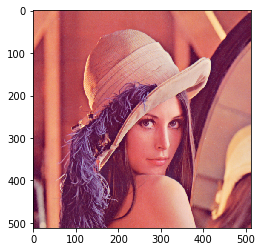

In [23]:
# hiển thị ảnh muốn dự đoán
display = cv2.imread('lenna.png')
plt.imshow(cv2.cvtColor(display, cv2.COLOR_BGR2RGB))


In [8]:
y_hat = model.predict(img) # lấy tập các xác suất cho đầu ra


In [24]:
# tìm label có xác suất lớn nhất, ở đây nó ra label thứ 452 trong số 1000 label
# của bộ ImageNet
print(np.argmax(y_hat))

452


In [28]:
# thử xem xác suất của nhãn thứ 452 này là bao nhiêu
print(y_hat.shape)
print('{} %'.format(y_hat[0][452]*100))

(1, 1000)
99.42848086357117 %


In [34]:
# độ chính xác cao đấy, nhưng mà nhãn số 452 là cái gì mới được
# decode nó thử coi
label = decode_predictions(y_hat)
print(type(label))

<class 'list'>


In [48]:
result = label[0][0]

In [49]:
print('%s (%.2f%%)' % (result[1], result[2]*100))

bonnet (99.43%)


<p>Nhãn là bonnet (đội nón) với xác suất 99.43%
Độ chính xác cao như thế bởi ta đang sử dụng mạng VGG16 với bộ dataset là ImageNet với hơn 1000 classes. VGG16 là kiến trúc có lẽ là nổi tiếng và hay được sử dụng nhất của CNN cộng với ImageNet là bộ dataset có thể nói là lớn nhất gồm hàng triệu bức ảnh. Model đã được train đã học được rất nhiều các đặc trưng ví dụ như chân, tay, mắt, mũi, miệng, ... </p>
"Deep learning is truly the super power" - Prof Andrew Ng